## Business Understanding

This is just a dataset for practicing to classify the sepsis illness only

Dataset Description:

    The provided data is a modified version of a publicly available data source, and is subject to copyright.

Donor of database:

 - The Johns Hopkins University, Johns Hopkins Road, Laurel, MD 20707, (301) 953-6231

Licence agreement:

    The dataset can only be used for the purpose of this assignment. Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.


**Data Dictionary**
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2)
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise



##  ANALYTICAL QUESTIONS

- What is the proportion of patients with a valid insurance card? 

- What is the distribution of body mass index (BMI) in the dataset?

- How does blood pressure (PR) vary with age among patients?

- Does the presence of valid insurance affect the likelihood of developing sepssis?

 

## HYPOTHESIS 

### 1
The null hypothesis : Patient's Insurance does not influence Sepssis
 
The alternate hypothesis : Patient's Insurance influences Sepssis 

### 2
The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)
 
The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

### 3
The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?
 
The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

### 4
The null hypothesis : Age does not have a significant impact on the development of sepsis in patients
 
The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

## 5
The null hypothesis: There a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?


The Alternative hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

## 6

The Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.


The Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

In [312]:
# Import all library packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
#from catboost import CatBoostClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

### DATA UNDERSTANDING

In [374]:
# Create Dataframe 
pfiles_df = pd.read_csv('/Users/mac/Documents/Group Project/P5-Machine-Learning-API/Data/Paitients_Files_Train.csv')

In [314]:
# Size of dataframe
pfiles_df.shape

(599, 11)

In [315]:
# retrieve first 5 rows
pfiles_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [316]:
# Information on the data
pfiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [317]:
# Description statistics of the data
pfiles_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200608,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [318]:
# Checking for null values
pfiles_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [319]:
# checking for duplicates
pfiles_df.duplicated().sum()

np.int64(0)

## OBSERVATION
- There are no missing values in the dataset.
- There are no duplicates in the dataset.
- The average age of patients is recorded as 33 years, with a minimum age of 21 years and a maximum age of 81 years.
- The average body mass index (BMI) is recorded as 31.99 kg/m², with the highest BMI being 67 kg/m².

### Exploratory Data Analysis: EDA

#### Univariate Analysis

In [320]:
# Drop ID column
pfiles_df.drop(columns= 'ID', inplace=True)

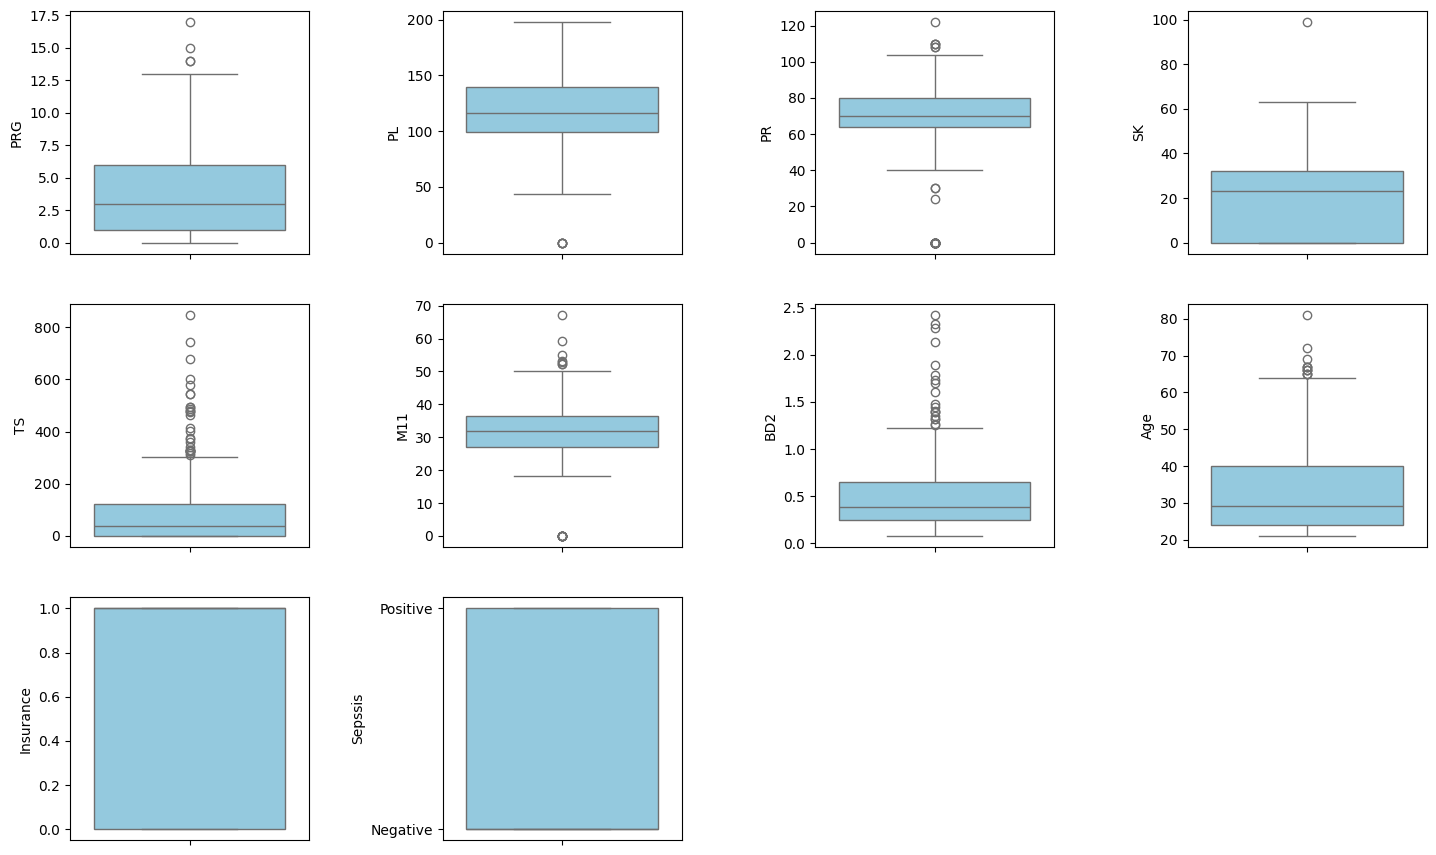

In [321]:
# Plot a box plot for the variables
plt.figure(figsize=(15, 15))

for i, variable in enumerate(pfiles_df):
    plt.subplot(5,4, i + 1)
    sns.boxplot(pfiles_df,y=pfiles_df[variable], color= 'skyblue')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

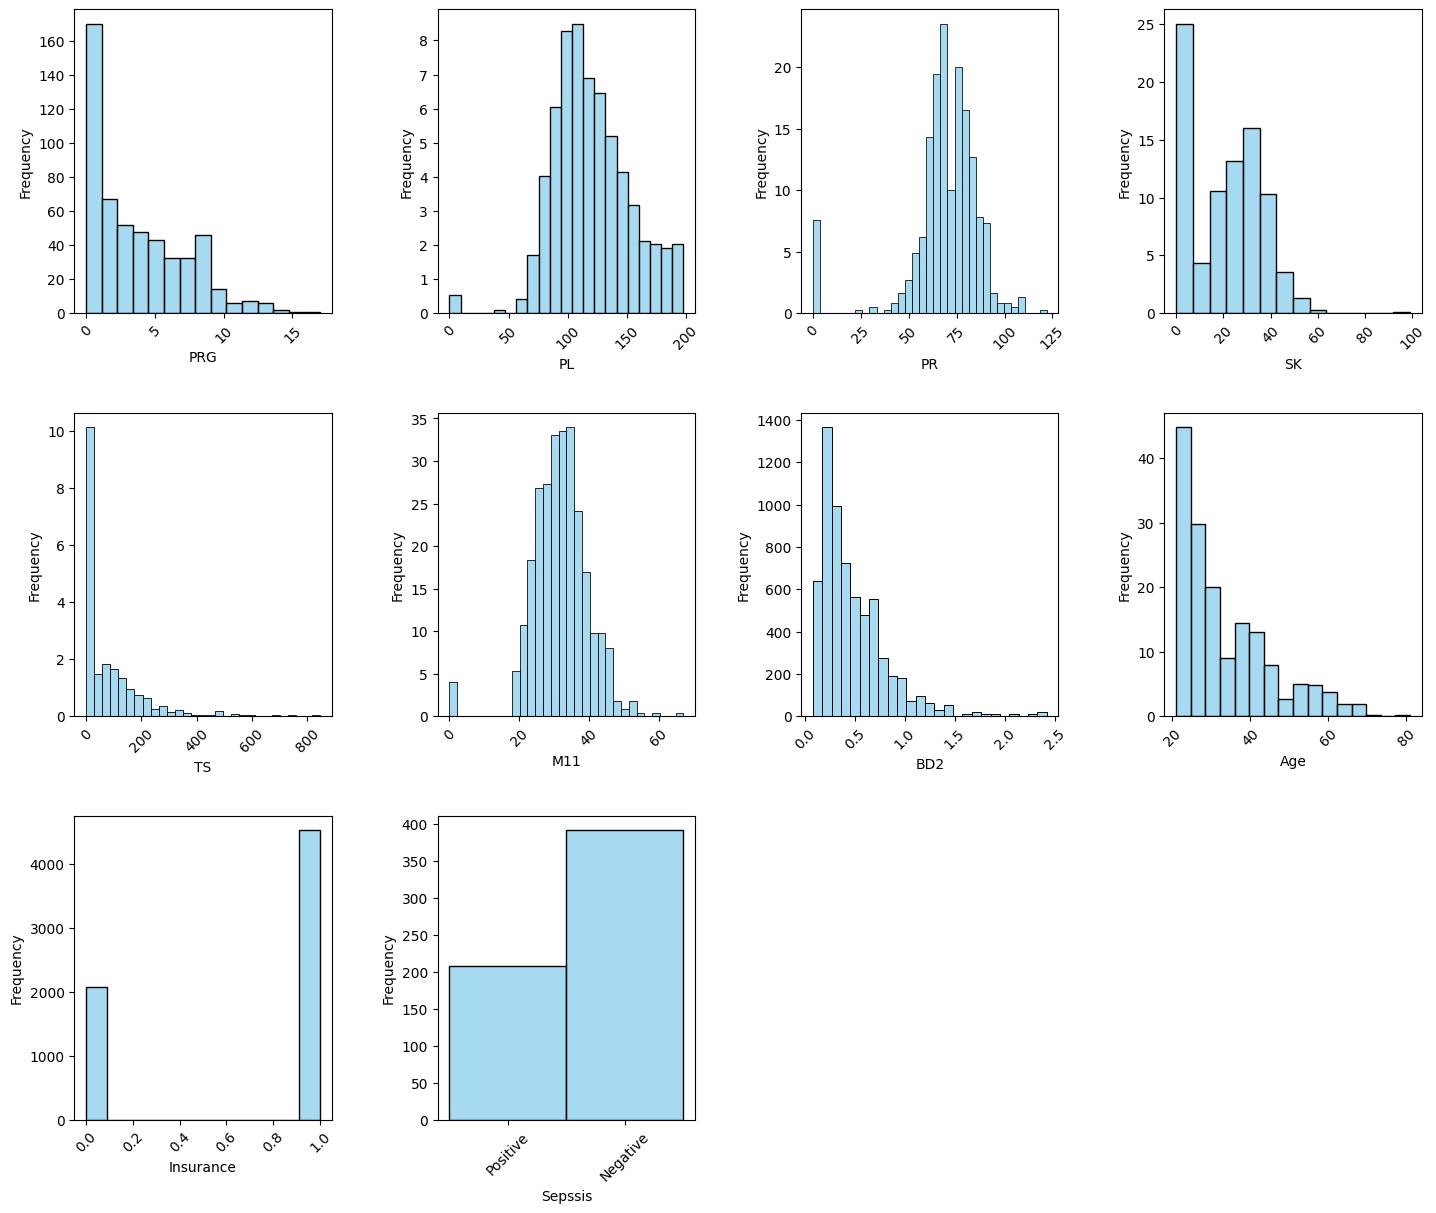

In [322]:

# Plot a Histogram plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency', color= 'skyblue')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

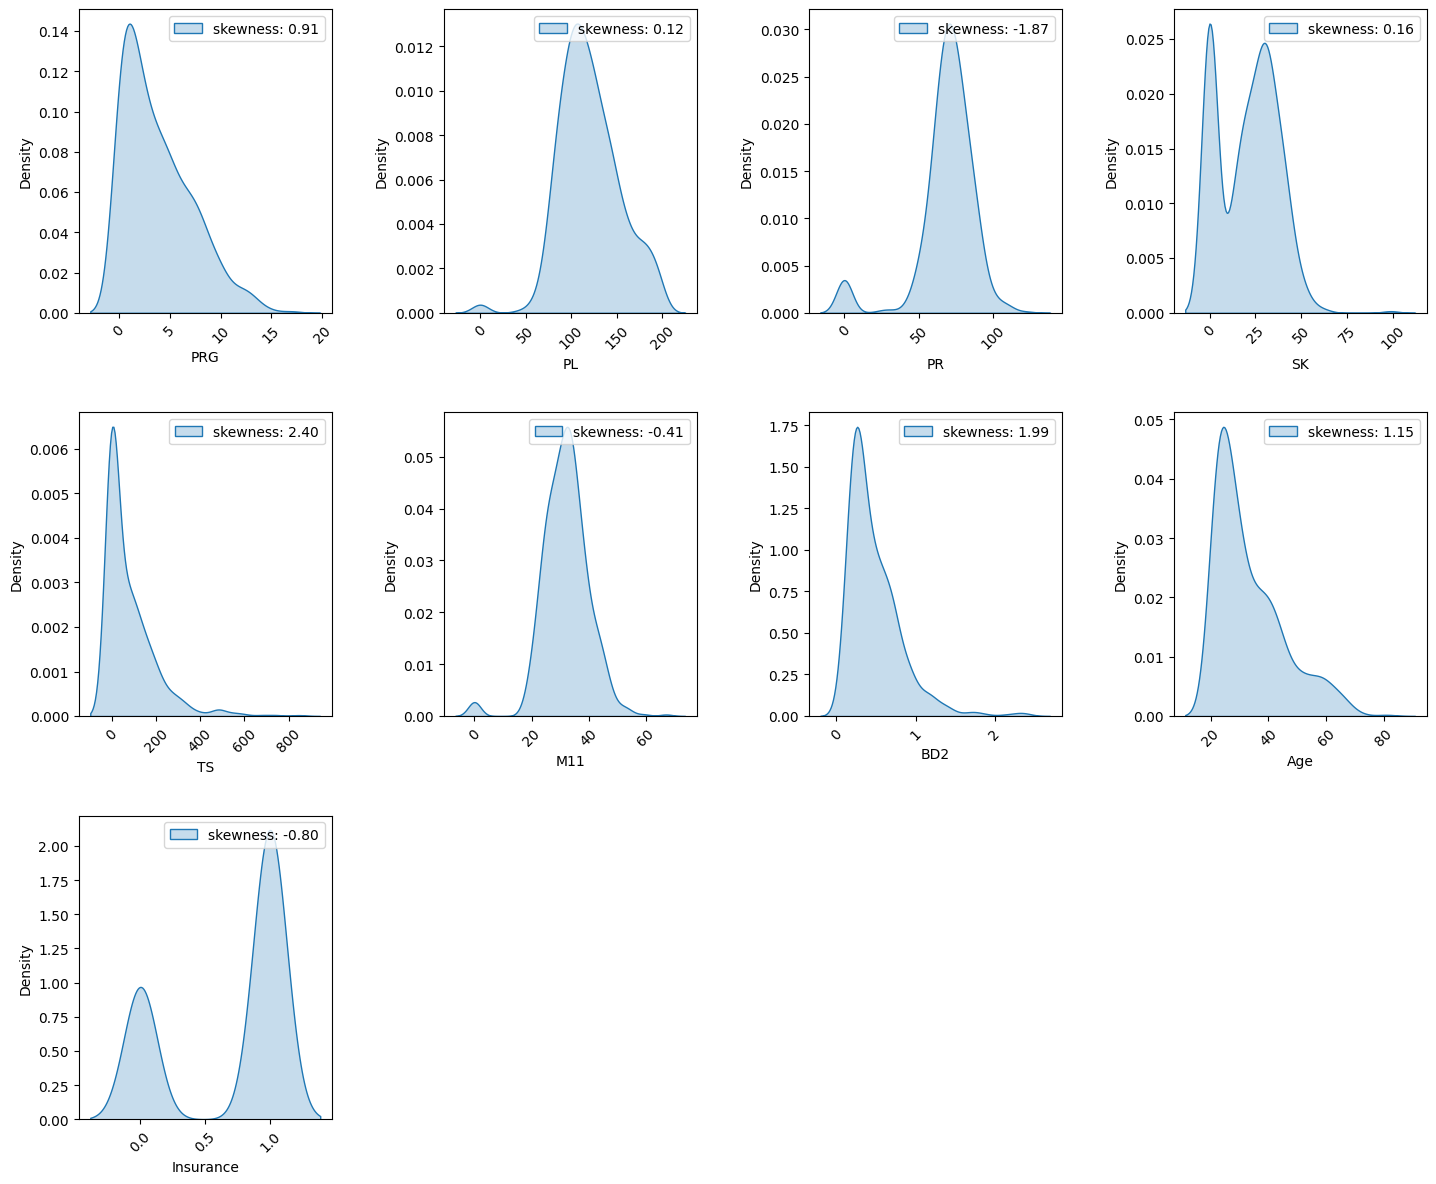

In [323]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df.drop(['Sepssis'], axis=1)):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(pfiles_df,x=pfiles_df[variable],label= 'skewness: %.2f'%(pfiles_df[variable].skew()), fill = True,)
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)
    

## OBSERVATION
- Few variables show Negative skewness such as Insurance, Body Mass index (M11), Blood pressure (PR) 
- Other variables show Positive skewness of which some have high posiitive skewness e.g  Blood work result 3 (TS) and Blood work result 4 (BD2), while some have low posiitive skewness e.g Plasma glucose (PRG), Age, Blood Work result 2(SK), Blood Work result 1 (PL)

#### Bivariate & Multivariate Analysis

In [324]:
# Filter out non-numerical columns
numerical_columns = pfiles_df.select_dtypes(include=['number']).columns

# Create a new DataFrame with only numerical columns
pfiles_numerical = pfiles_df[numerical_columns]

# Separate the DataFrame into positive and negative sepsis cases
pfiles_positive = pfiles_numerical[pfiles_df['Sepssis'] == 'Positive']
pfiles_negative = pfiles_numerical[pfiles_df['Sepssis'] == 'Negative']


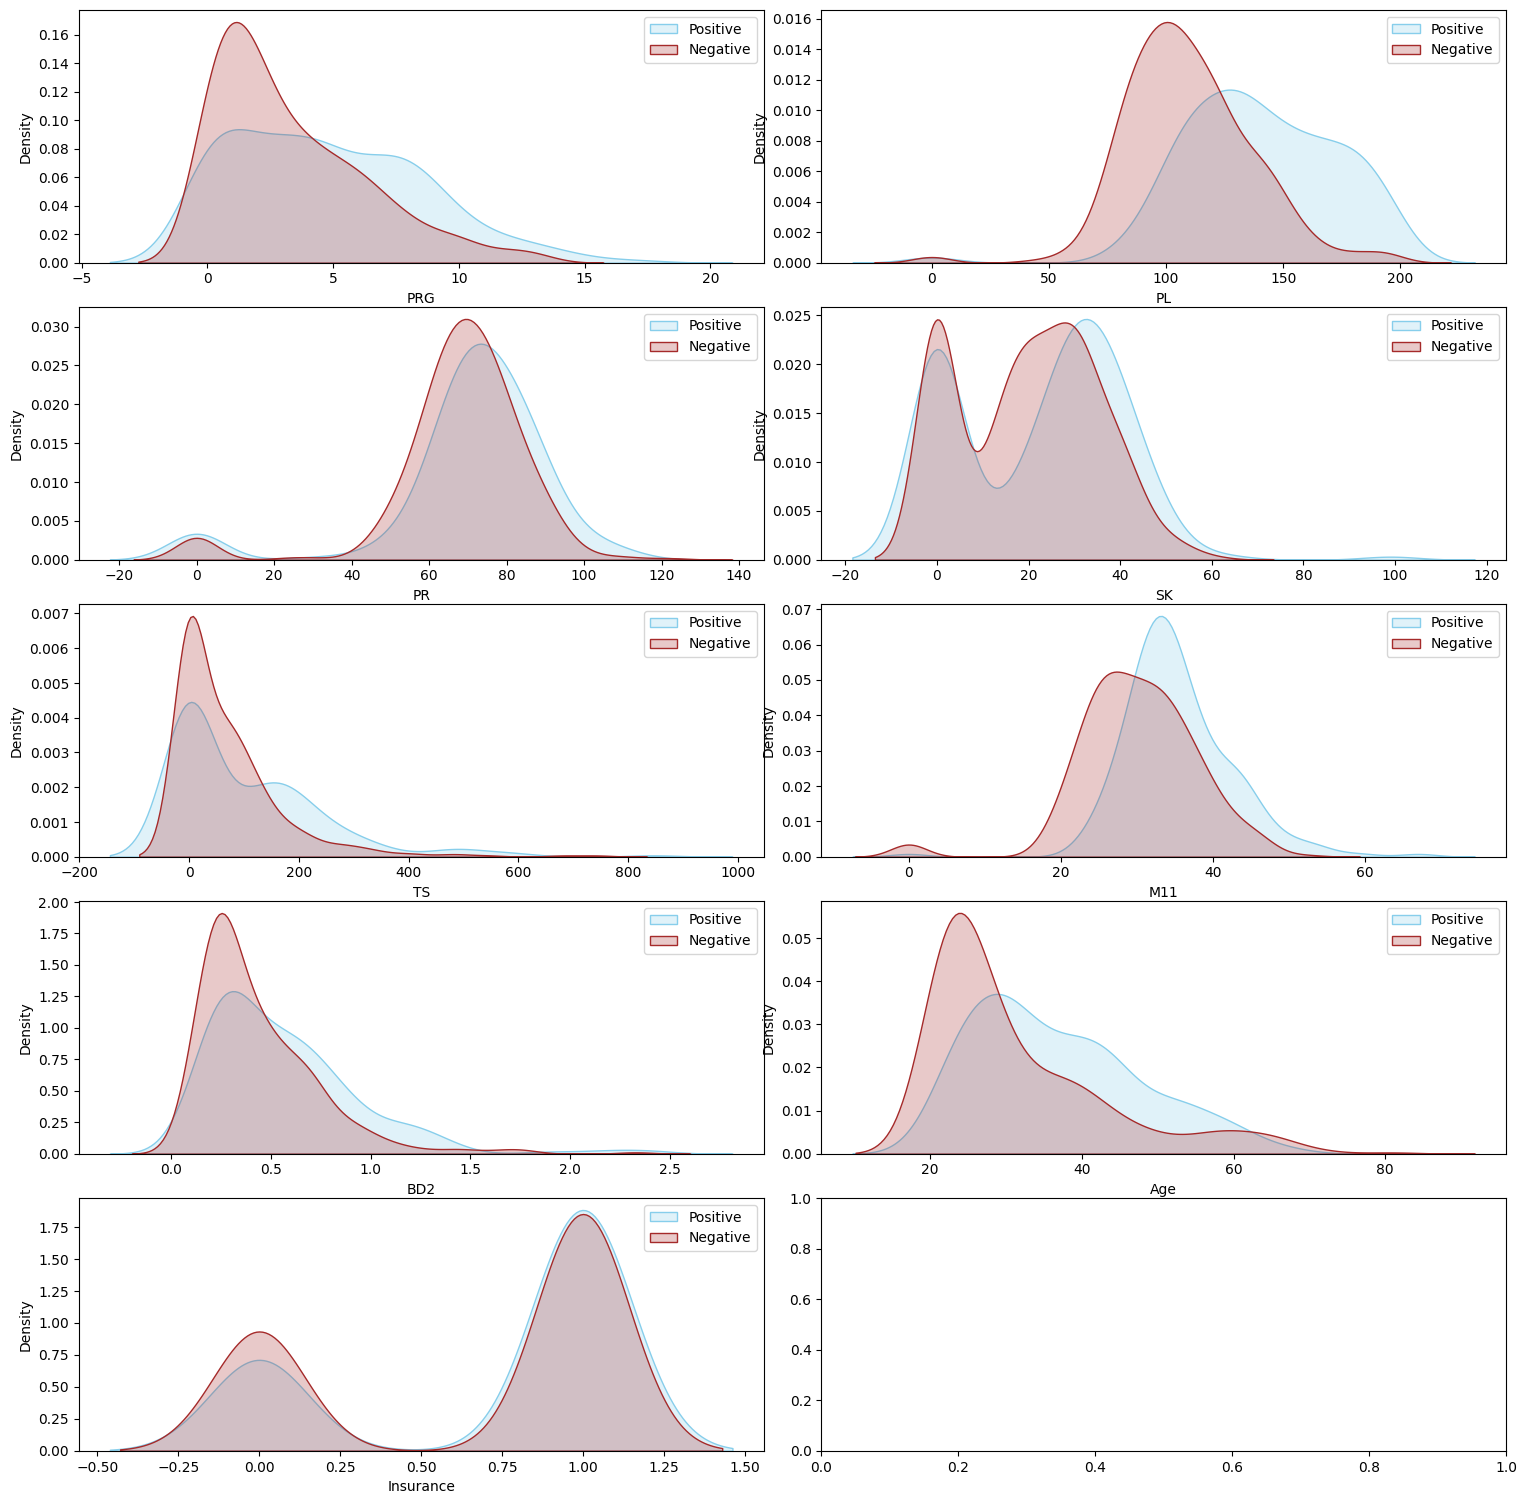

In [325]:
# Plot a kernel density plot for the negative and positive sepssis within all variables
num_rows, num_cols = 5, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.tight_layout()

for index, column in enumerate(numerical_columns):
    ax = axes[index // num_cols, index % num_cols]
    sns.kdeplot(pfiles_positive[column], color='skyblue', fill=True, ax=ax, label='Positive')
    sns.kdeplot(pfiles_negative[column], color='brown', fill=True, ax=ax, label='Negative')
    ax.set_xlabel(column)
    ax.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

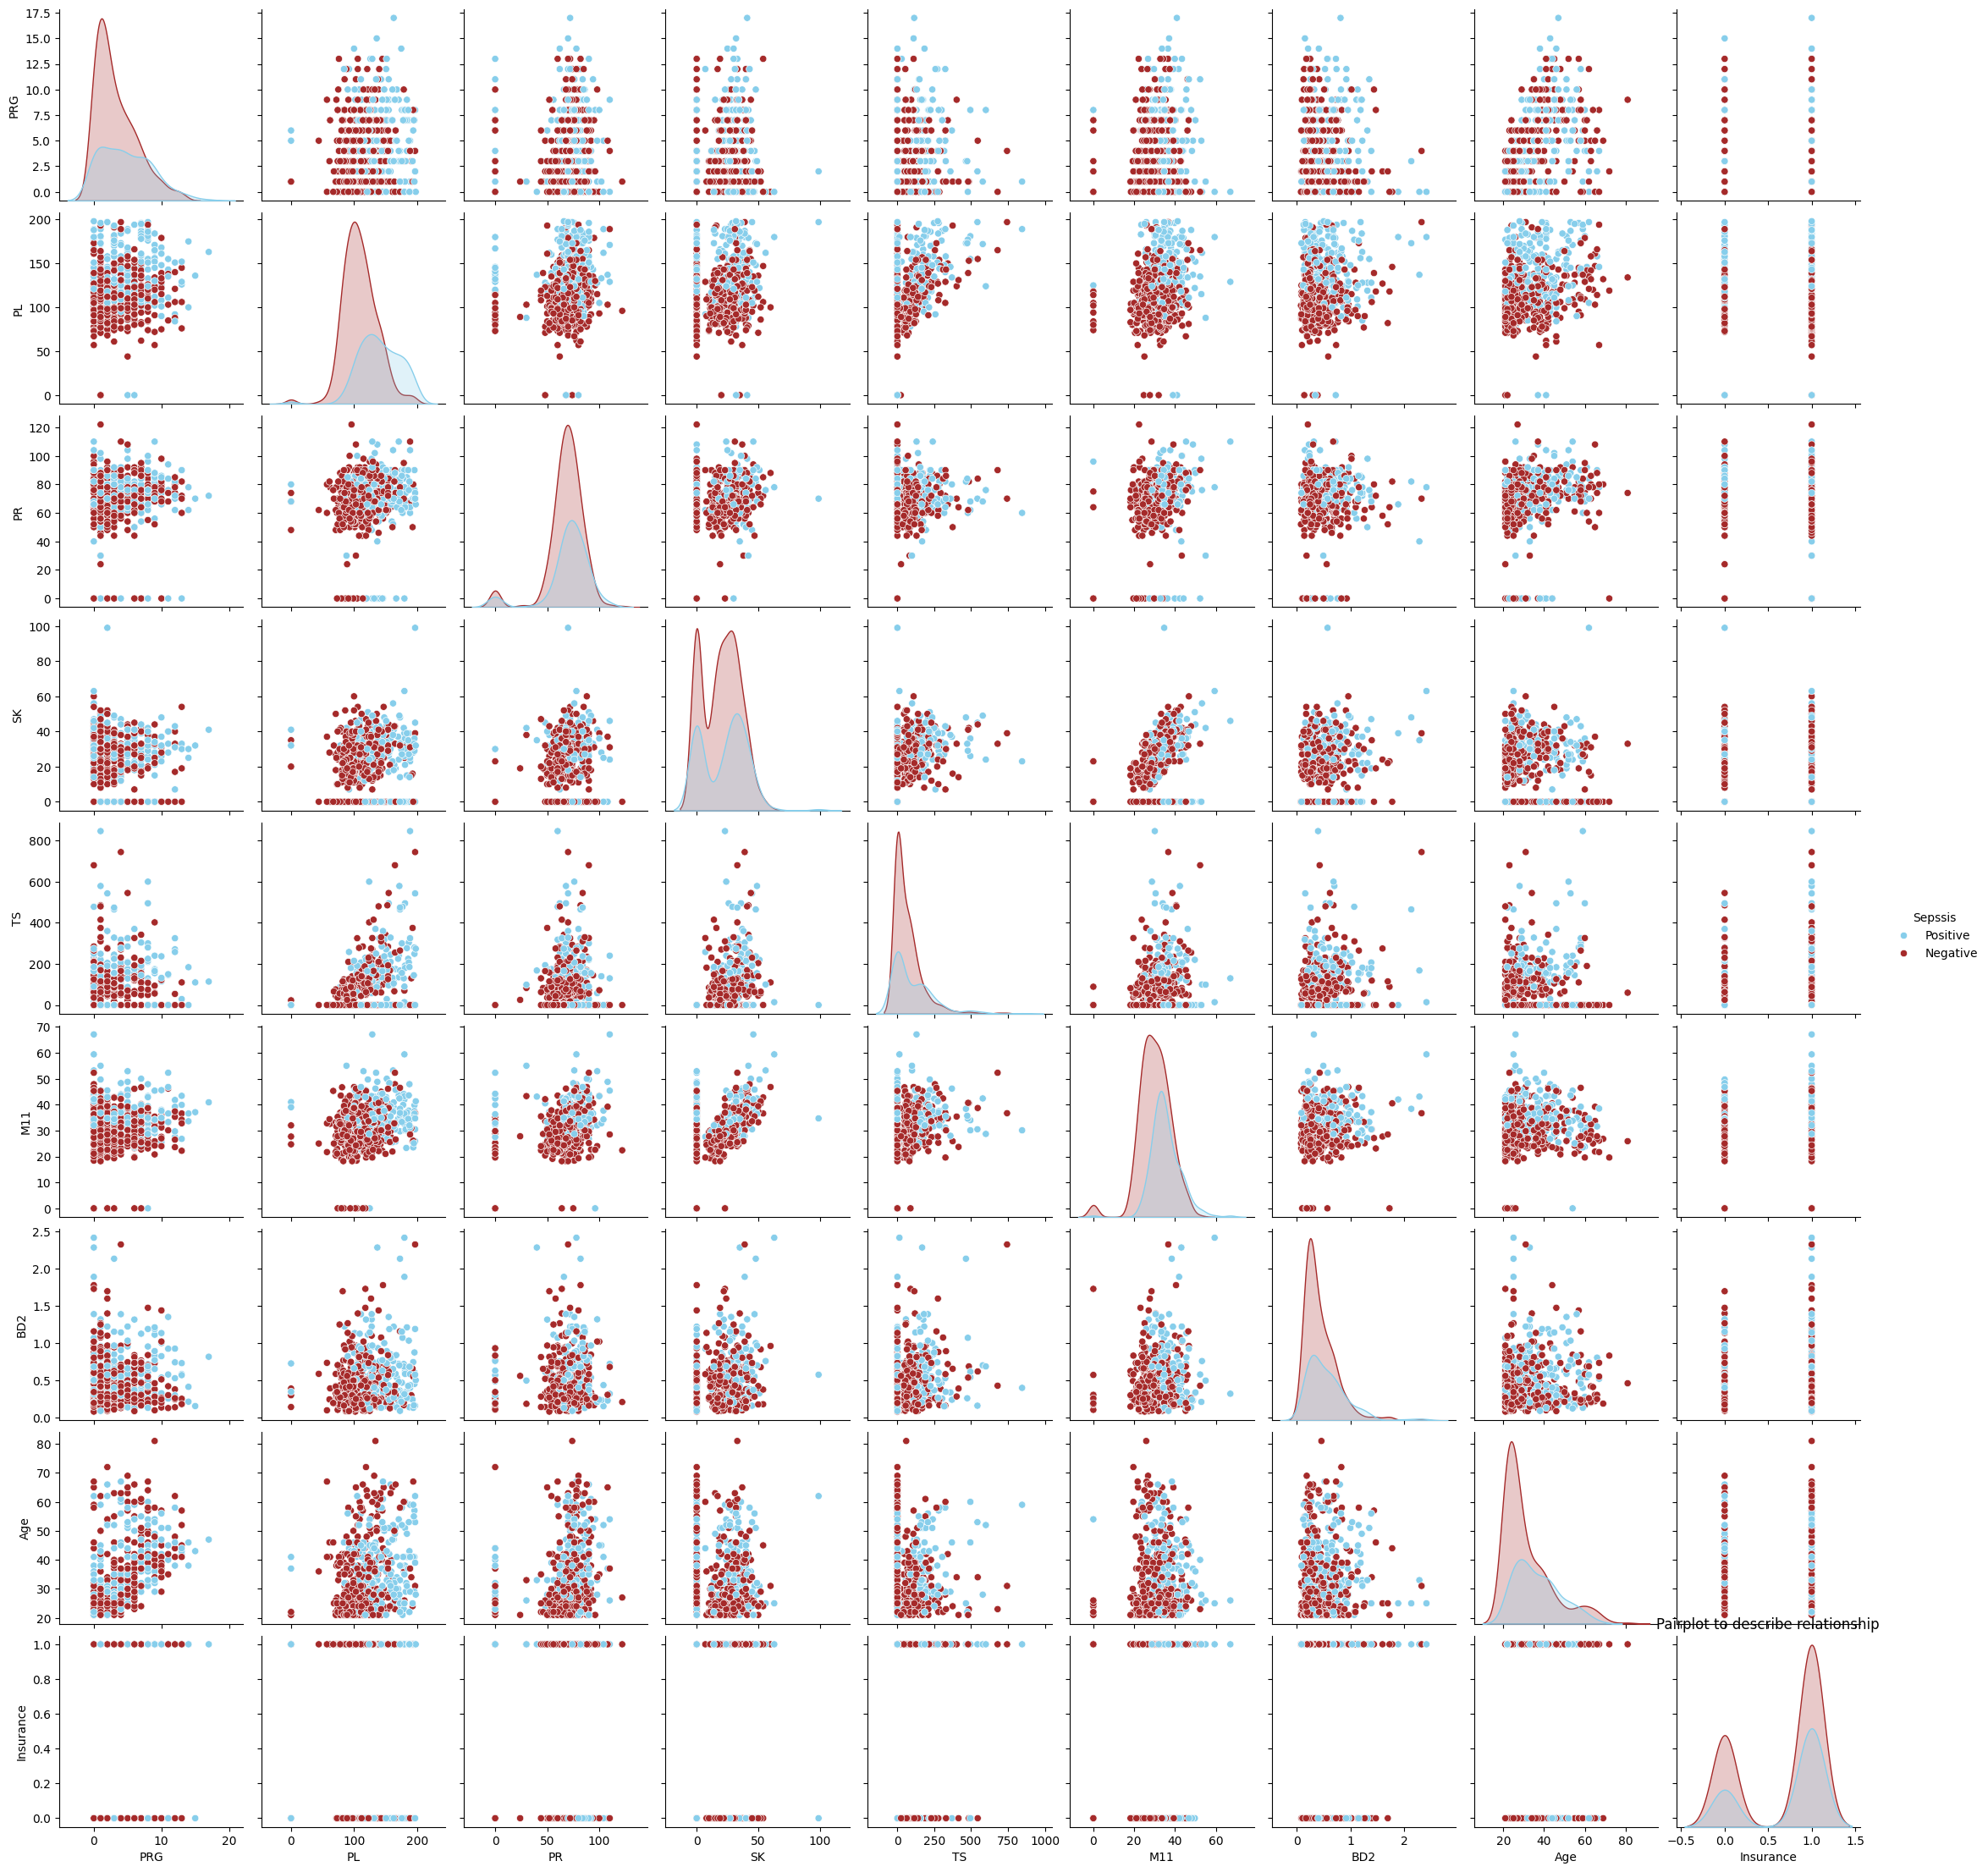

In [326]:
# Plot a pair plot for the correlation of variables
plt.figure(figsize=(10,5))
sns.pairplot(data=pfiles_df, hue='Sepssis', palette=['skyblue', 'brown'])
plt.title('Pairplot to describe relationship')
plt.show()

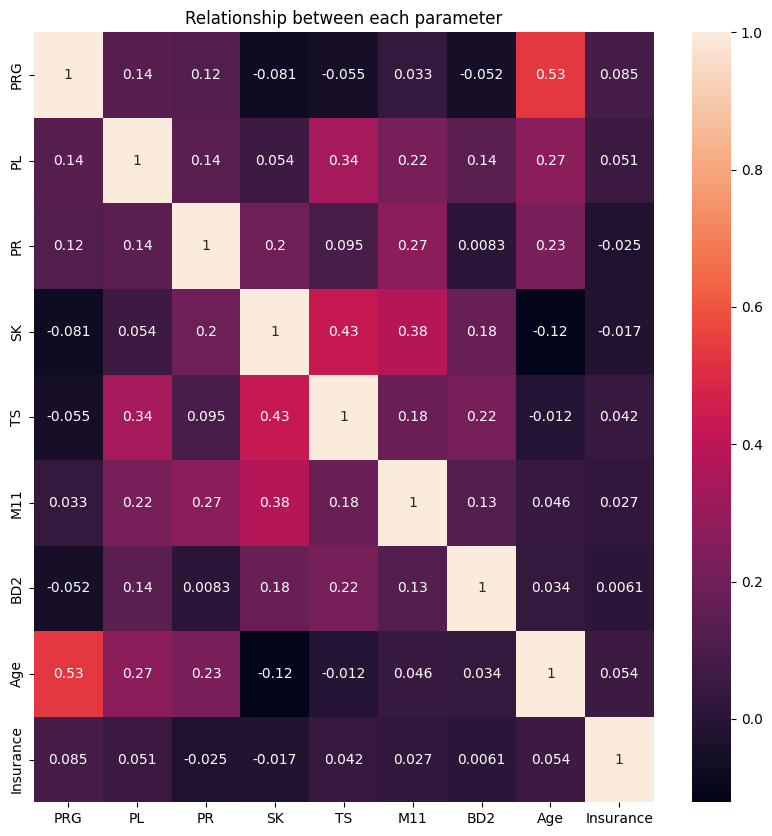

In [327]:
# Plot a Heatmap for correlation of the variables
plt.figure(figsize=(10, 10))
sns.heatmap(data=pfiles_df.drop(['Sepssis'], axis=1).corr(), annot=True)
plt.title('Relationship between each parameter')
plt.show()

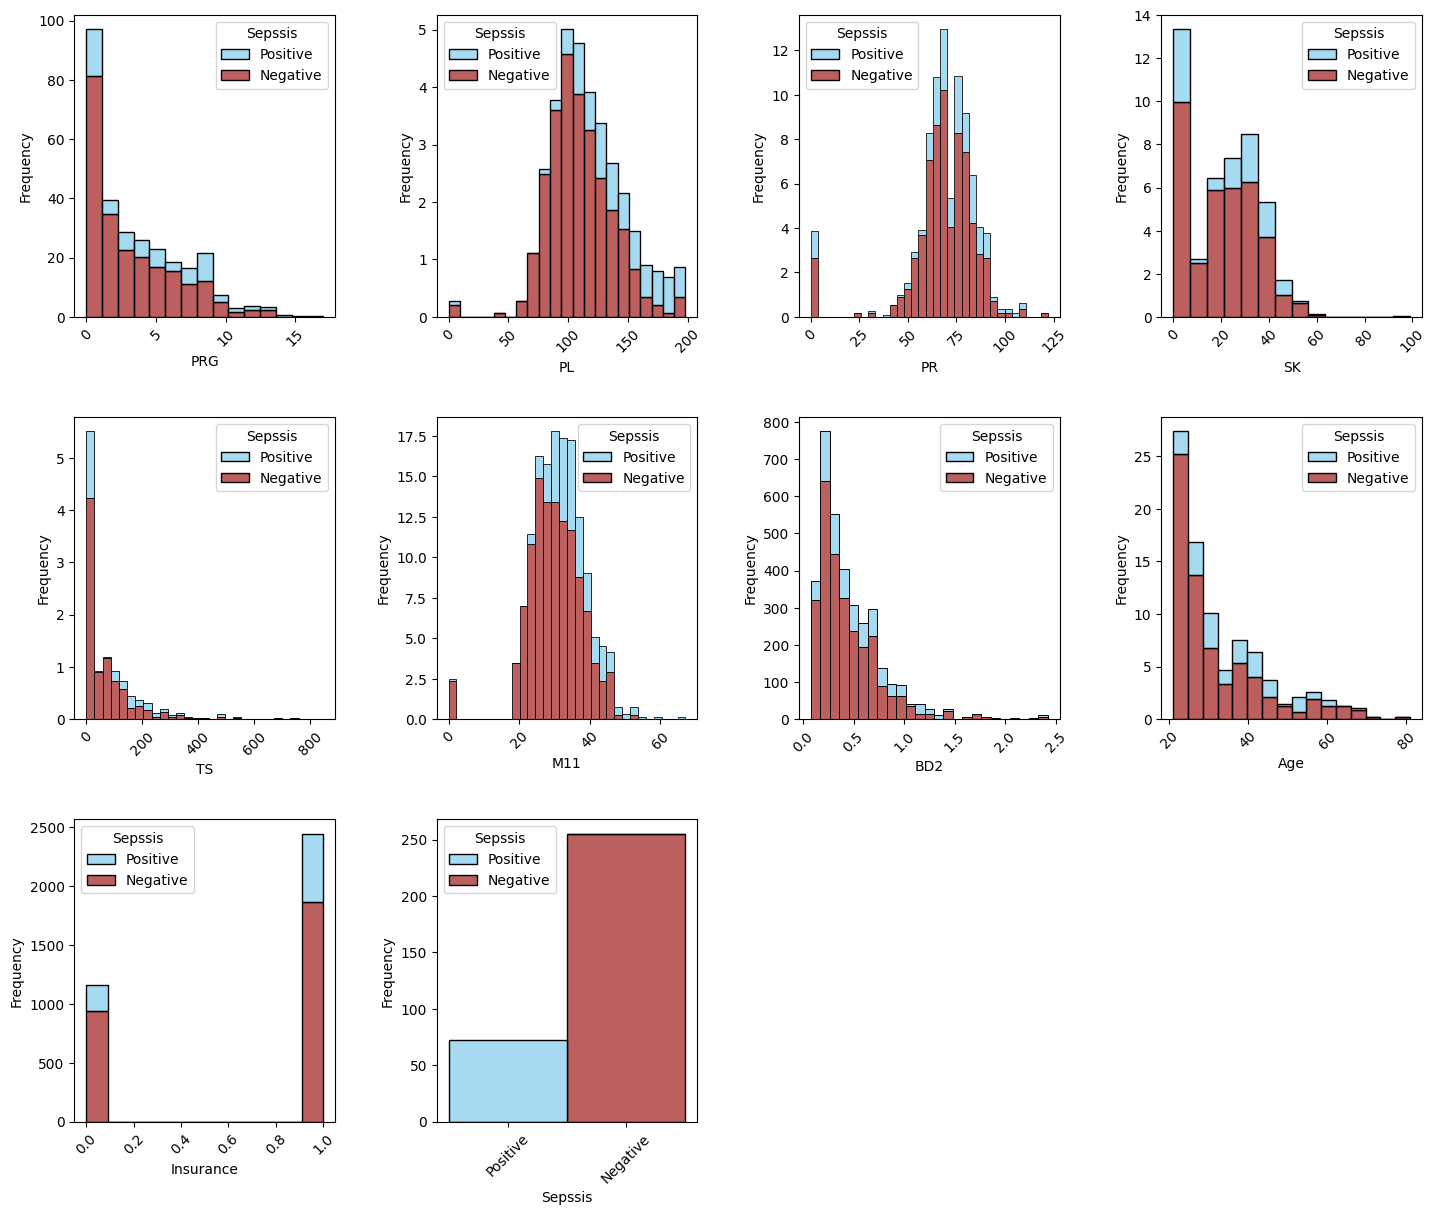

In [328]:
# Plot a bivariate Histogram plot for Poasitive and negative sepssis in each variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(pfiles_df):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency', hue='Sepssis', multiple='stack', palette=['skyblue', 'brown'])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

## OBSERVATION
- Blood work result -2 (SK) and Blood work result -3 (TS) has a good positive correlation, same goes with AGE and Plasma glucose (PRG)
- Positive sepssis and negative sepsis are skewly distributed within the ages, although Positive sepssis is overly skewed. Same goes with Blood work result -4 (BD2) and Blood work result -3 (TS).

## ANALYTICAL QUESTIONS

1. What is the proportion of patients with a valid insurance card? 

In [329]:
# create a copy of dataframe
pfiles = pfiles_df.copy()

In [330]:
# Replacing the values
pfiles['Insurance'] = pfiles['Insurance'].map({0: 'Invalid', 1: 'Valid'})

In [331]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [332]:
# Getting the counts of Insurance 
Patient_counts = pfiles['Insurance'].value_counts()
explode = [0.05 if label == 'Invalid' else 0 for label in Patient_counts.index]

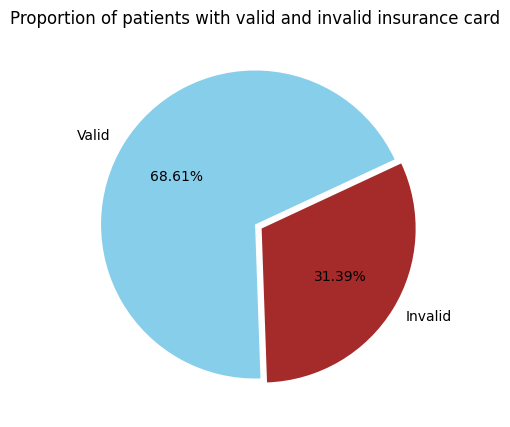

In [333]:
# Plot a pie chart for the variables
plt.figure(figsize=(5, 5))
plt.pie(Patient_counts, labels=Patient_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.title('Proportion of patients with valid and invalid insurance card')
plt.show()

 - The proportion of patients with valid and invalid insurance is 68.61% and 31.39% respectively

2. How does blood pressure (PR) vary with age among patients?

In [334]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [335]:
# Grouping the age and blood pressure and retrieving the average of PR
Age_pressure = pfiles.groupby('Age')['PR'].mean().reset_index()

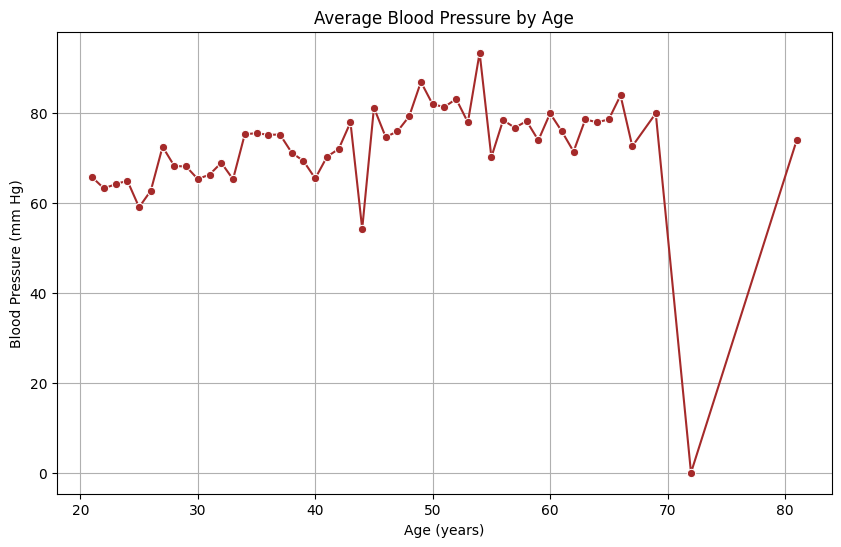

In [336]:
# Plotting line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='PR', data=Age_pressure, marker='o', color='brown')
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(True)
plt.show()

- The highest average blood pressure (85mm/Hg) is recorded at 52 years of age, while the age with the lowest average blood pressure (0mm/Hg) is 71 years.

3. Does the presence of valid insurance affect the likelihood of developing sepsis?

In [337]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [338]:
# Grouping Insurance to sepssis
insurance_sepssis = pfiles.groupby('Insurance')['Sepssis'].value_counts().reset_index()

In [339]:
insurance_sepssis

,Insurance,Sepssis,count
0,Invalid,Negative,131
1,Invalid,Positive,57
2,Valid,Negative,260
3,Valid,Positive,151


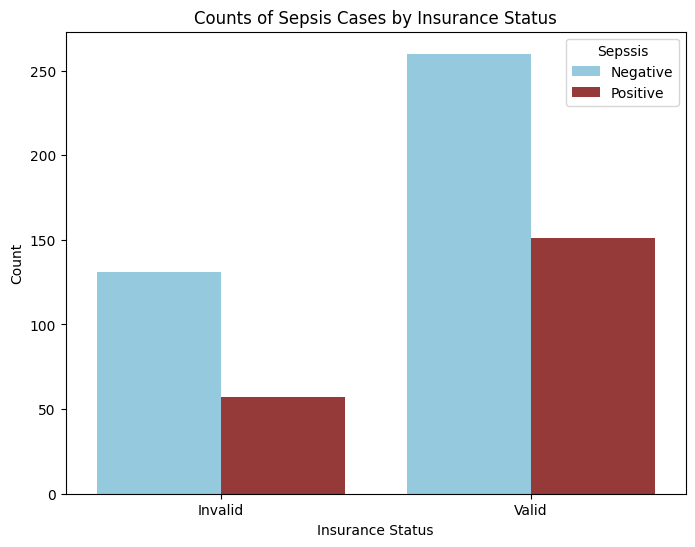

In [340]:
# Plotting bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Insurance', y='count', hue='Sepssis', data=insurance_sepssis, palette=['skyblue', 'brown'])
plt.title('Counts of Sepsis Cases by Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.show()

- The presence of valid insurance affects the likelihood of developing sepsis, mostly due to its high record rate compared to the invalid insurance rate

4. How does the average body mass index (BMI) differ between patients who develop sepsis and those who do not?



In [341]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [342]:
# Grouping Sepssis to BMI
Avg_M11_sepsis = pfiles.groupby('Sepssis')['M11'].mean()

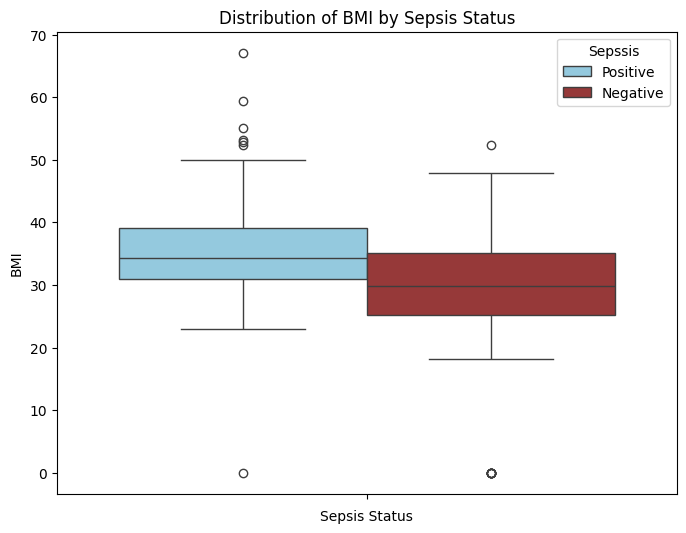

In [343]:
# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(hue='Sepssis', y='M11', data=pfiles, palette=['skyblue', 'brown'], legend =True)
plt.title('Distribution of BMI by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('BMI')
plt.show()


- The average BMI (M11) Hits at 34kg with patients who test positive to sepssis, which is higher than patients who do not develop sepssis (30kg)

## HYPOTHESIS 

## 1.

The null hypothesis : Patient's Insurance does not influence Sepssis
 
The alternate hypothesis : Patient's Insurance influences Sepssis 


HYPOTHESIS TEST: CHI-SQUARE TEST OF INDEPENDENCE

In [344]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [345]:
# cross tabulate the pair
insurance_sepssis = pd.crosstab(pfiles['Insurance'], pfiles['Sepssis'])

# Perform the chi-square test
chi2, p, dof, expected  = chi2_contingency(insurance_sepssis)
# Print the results
print(f"Chi-squared:", {chi2})
print(f"p-value:", {p})
print(f"Degrees of freedom:", {dof})
print(f"Expected frequencies:", expected)
# our significance level
α = 0.05
# Comparing the p-value with α
if p < 0.05:
    print(f"As the p-value {p} is less than the level of significance, we reject that the Patient's Insurance does not influence Sepssis.")
else:
    print(f"As the p-value {p} is greater than the level of significance, we fail to reject that the Patient's Insurance does not influence Sepssis.")


Chi-squared: {np.float64(2.0712782081677066)}
p-value: {np.float64(0.1500956791860619)}
Degrees of freedom: {1}
Expected frequencies: [[122.71786311  65.28213689]
 [268.28213689 142.71786311]]
As the p-value 0.1500956791860619 is greater than the level of significance, we fail to reject that the Patient's Insurance does not influence Sepssis.


## 2. 

The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)
 
The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)


HYPOTHESIS TEST: PEARSONR TEST

In [346]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [347]:
# Calculate the Pearson correlation coefficient
r, p = pearsonr(pfiles["PL"], pfiles["SK"])

print("Correlation coefficient (r):", r)
print("p-value:", p)

Correlation coefficient (r): 0.05442990074670593
p-value: 0.18340395562212572


In [348]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p < α:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.18340395562212572 is greater than the level of significance, we fail to reject the null hypothesis.


## 3. 

The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?
 
The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

HYPOTHESIS TEST: MANN-WHITNEY U Test:

In [349]:
Positive_PR = pfiles[pfiles['Sepssis'] == 'Positive']['PR']
Negative_PR = pfiles[pfiles['Sepssis'] == 'Negative']['PR']

In [350]:
# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(Positive_PR, Negative_PR)
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 47673.5
P-value: 0.0005014049708706393


In [351]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 0.0005014049708706393 is less than the level of significance, we reject the Null Hypothesis.


## 4.

The null hypothesis : Age does not have a significant impact on the development of sepsis in patients
 
The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

HYPOTHESIS TEST: MANN-WHITNEY U Test:

In [352]:
pfiles.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [353]:
# Filter the Ages for each sepssis
positive_age = pfiles[pfiles['Sepssis']== 'Positive']['Age']
negative_age = pfiles[pfiles['Sepssis']== 'Negative']['Age']

In [354]:
# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(positive_age, negative_age)
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 54836.5
P-value: 1.9719624253603723e-12


In [355]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 1.9719624253603723e-12 is less than the level of significance, we reject the Null Hypothesis.


## 5
The null hypothesis: There a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?


The Alternative hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

 
HYPOTHESIS TEST: MANN-WHITNEY U Test

In [356]:
# Separate the groups based on sepsis outcome
sepsis_positive = pfiles[pfiles['Sepssis'] == 'Positive']['PRG']
 
sepsis_negative = pfiles[pfiles['Sepssis'] == 'Negative']['PRG']
 
# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)
 
# Print the results
print(f'Mann-Whitney U Test: U-statistic = {stat}, \n  p-value = {p_value}')
 
# Interpretation of the results
if p_value < 0.05:
    print('There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')
else:
    print('There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')

Mann-Whitney U Test: U-statistic = 49635.0, 
  p-value = 7.517335229649623e-06
There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.


## 6

The Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.


The Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

HYPOTHESIS TEST: MANN-WHITNEY U Test

In [357]:
blood_work_columns = ['PL', 'SK', 'TS', 'BD2']
 
# Initialize a dictionary to store test results
results = {} 

In [358]:
 
# Separate the groups based on sepsis outcome
sepsis_positive = pfiles[pfiles['Sepssis'] == 'Positive']
sepsis_negative = pfiles[pfiles['Sepssis'] == 'Negative']
 
# Perform the Mann-Whitney U Test for each blood work result
for col in blood_work_columns:
    positive_values = sepsis_positive[col]
    negative_values = sepsis_negative[col]
   
    # Perform the test
    stat, p_value = mannwhitneyu(positive_values, negative_values)
   
    # Store the results
    results[col] = {'U-statistic': stat, 'p-value': p_value}

In [359]:
# Print the results
for col, result in results.items():
    print(f'Blood Work Result: {col}')
    print(f"  U-statistic: {result['U-statistic']}")
    print(f"  p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print('  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.\n')
    else:
        print('  There is no significant difference in this blood work result between patients who develop sepsis and those who do not.\n')

Blood Work Result: PL
  U-statistic: 63515.5
  p-value: 9.039444101550678e-30
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: SK
  U-statistic: 44975.5
  p-value: 0.0303558775856338
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: TS
  U-statistic: 44619.5
  p-value: 0.03737172167275455
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: BD2
  U-statistic: 49738.5
  p-value: 6.800958896250743e-06
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.



## MODELLING

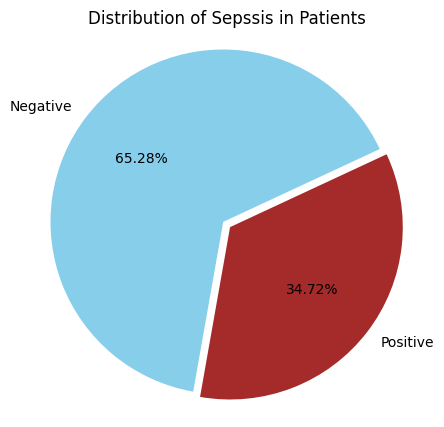

In [360]:
# retrieving the counts of sepssis
sepssis_counts = pfiles_df['Sepssis'].value_counts()
explode = [0.05 if label == 'Positive' else 0 for label in sepssis_counts.index]

# plot pie chart
plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

In [361]:
# Treating outliers
def replace_outliers(pfiles_df):
        for column_name in pfiles_df.select_dtypes(include=['number']).columns:
            Q1 = pfiles_df[column_name].quantile(0.25)
            Q3 = pfiles_df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            LOWER_BOUND = Q1 - 1.5 * IQR
            UPPER_BOUND = Q3 + 1.5 * IQR

            pfiles_df[column_name] = pfiles_df[column_name].apply(lambda x: UPPER_BOUND if x> UPPER_BOUND else (LOWER_BOUND if x< LOWER_BOUND else x))

        return pfiles_df

In [362]:
pfiles_df= replace_outliers(pfiles_df)

#### Dataset Splitting

In [363]:
# creating a X and y variable
X = pfiles_df.drop(columns=['Sepssis']) 

y = pfiles_df['Sepssis']  

In [364]:
# splitting the data 
X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size = 0.25, random_state = 5, stratify = y)

In [365]:
# shape of each variables
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (449, 9)
X_eval shape: (150, 9)
y_train shape: (449,)
y_eval shape: (150,)


### PIPELINES

In [366]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)


#selecting numeric  columns
numeric_cols=X_train.select_dtypes(include='number').columns


#numerical pipeline
num_pipeline=Pipeline(steps=[
    ('num_scaler', StandardScaler()),
    ('Simple_imputer', SimpleImputer(strategy= 'median'))
])

preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numeric_cols)
])

In [367]:
# Creating a dictionary for the models to be used
models={}
models['Logistic_Regression']= LogisticRegression(random_state=5)
models['Decision_Tree']= DecisionTreeClassifier(random_state=5)
models['Random_Forest']= RandomForestClassifier(random_state=5)
#models['Category_Boosting']= CatBoostClassifier(random_state=5, verbose=0)
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=5)
#models['XGBoost']= XGBClassifier(random_state=5)

# Define feature selection step
feature_selection = SelectKBest(score_func= mutual_info_classif, k='all')

#### TRAIN AND EVALUATE ON BALANCED LABELS

In [368]:
# Creating Pipeline

all_pipelines_balanced = {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])
     #fitting the train data 
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    # Predicting evaluation data
    y_pred=balanced_pipeline.predict(X_eval)
    
    # classification report for the y_pred and y_eval_encode
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

# sort the metrics value in ascending order by f1-score
metric_table_balanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
0,Logistic_Regression,0.740000,0.765841,0.740000,0.745613
3,Gradient_Boosting,0.706667,0.715647,0.706667,0.710035
2,Random_Forest,0.693333,0.702569,0.693333,0.696855
1,Decision_Tree,0.653333,0.663333,0.653333,0.657314


#### TRAIN AND EVALUATE ON IMBALANCED LABELS

In [369]:
# Creating Pipeline

all_pipelines_balanced = {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])

     #fitting the train data    
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    # Predicting evaluation data
    y_pred=balanced_pipeline.predict(X_eval)
    
    # classification report for the y_pred and y_eval_encode
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

# sort the metrics value in ascending order by f1-score
metric_table_balanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
0,Logistic_Regression,0.740000,0.733630,0.740000,0.735101
3,Gradient_Boosting,0.726667,0.725466,0.726667,0.726034
2,Random_Forest,0.726667,0.718360,0.726667,0.719719
1,Decision_Tree,0.640000,0.646717,0.640000,0.642917


In [372]:
from sklearn.model_selection import GridSearchCV
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numeric_cols)
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
pparam_grids = {
    'Logistic_Regression': {'logistic_regression__C': [10, 100, 200, 300]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 5, 10]},
    'Random_Forest': {'random_forest__n_estimators': [200, 300, 400], 'random_forest__max_depth': [10, 20, 30]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [100], 'gradient_boosting__max_depth': [2, 3], 'gradient_boosting__learning_rate': [0.1, 1, 10]},
}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Category_Boosting', 'Gradient_Boosting', 'XGBoost']:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(pipeline, pparam_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Tuning Logistic_Regression...


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.